In [111]:
%matplotlib inline

In [133]:
import os
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsap
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white

dir_path = os.path.abspath('')

#dir_path = os.path.abspath(os.path.join(os.path.dirname(__file__)))
                                        # , ".."))
data = os.path.join(dir_path, 'test_data.xlsx')

In [122]:
# Import the OECD foreign aid data into dataframe
aid_df = pd.read_excel(data, index_col=0, sheet_name="aid")
aid_df = aid_df.sort_values("recipient_name", ascending=True)

# Import the electrification rate data into dataframe
elec_rate_df = pd.read_excel(data, index_col=0, sheet_name="elec")
elec_rate_df = elec_rate_df.sort_values("Country Name", ascending=True)

In [207]:
data_df = pd.read_excel(data, index_col=0, sheet_name="azdata")

data_df.index = pd.Series(data_df.index).fillna(method='ffill')
#                         
data_df.tail()

,year_name,Energy Policy,Energy distribution,"Energy generation, non-renewable sources","Energy generation, renewable sources",Nuclear energy plants,elec_rate
recipient_name,,,,,,,
Cote d'Ivoire,2004,3112,0,0,0,0,52.586502
Cote d'Ivoire,2005,0,2345,0,0,0,58.900000
Cote d'Ivoire,2006,0,0,65423,0,0,60.171053
Cote d'Ivoire,2007,0,2345,0,0,0,55.419781
Cote d'Ivoire,2008,0,2345,0,0,0,60.300000


In [223]:
# print(aid_df, elec_rate_df)

In [123]:
# Transpose the electrification rate data
# transposed_etd = elec_rate_df.transpose()

# Stack electrification rate by country and year
stacked_elec_df = elec_rate_df.stack()
_ = stacked_elec_df.fillna(0, inplace=True)
print(stacked_elec_df)

Country Name       
Angola         2001    20.000000
               2002    26.383869
               2003    27.465635
               2004    28.536760
               2005    29.596224
                         ...    
Cote d'Ivoire  2004    52.586502
               2005    58.900000
               2006    60.171053
               2007    55.419781
               2008    60.300000
Length: 72, dtype: float64


In [127]:
# Group the country sub-sectors by year and sum the amount of aid
sector_aid = aid_df.groupby(['recipient_name',
                             'year_name',
                             'lvl_1_sector_name']
                           )[['usd_disbursement']].sum()

print(sector_aid)
# Create a list that holds all sub-sector names 
# sub-sectors = ["Energy distribution", "Energy generation, non-renewable sources", "Energy generation, renewable sources", "Energy Policy"]

                                                                   usd_disbursement
recipient_name year_name lvl_1_sector_name                                         
Angola         2001      Energy generation, renewable sources                 78289
               2002      Energy generation, non-renewable sources             65423
                         Nuclear energy plants                               -23027
               2003      Energy Policy                                         2345
                         Energy distribution                                 468110
...                                                                             ...
Cote d'Ivoire  2004      Energy Policy                                         3112
               2005      Energy distribution                                   2345
               2006      Energy generation, non-renewable sources             65423
               2007      Energy distribution                                

In [201]:
# Organize sub-sector into columns
sub_sec_sum = sector_aid.reset_index().pivot_table(
                   index=['recipient_name', 'year_name'],
                   columns='lvl_1_sector_name',
                   values='usd_disbursement')

# Fill in NA values with 0s.
_ = sub_sec_sum.fillna(0, inplace=True)

# print(sub_sec_sum)

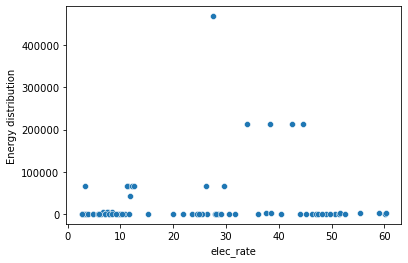

In [164]:
sns.scatterplot(x=data_df['elec_rate'],  
                y=data_df['Energy distribution'],
#                 hue=sub_sec_sum['recipient_name']).set(title=                
#                 'Electrification rate'
               )
 
plt.show()

In [222]:
# for recipient_name in data_df:

# for name, group in df.groupby('interview'):
for name, group in data_df.groupby('recipient_name'):
    
    print(name)
    y=data_df['elec_rate']

    X=data_df[['Energy distribution',
               'Energy generation, non-renewable sources',
               'Energy Policy',
               'Energy generation, renewable sources'                  
              ]]

#     pooled_X = sm.add_constant(pooled_X)
    
    res = sm.OLS(y, X).fit()

    print(res.summary())

Angola
                                 OLS Regression Results                                
Dep. Variable:              elec_rate   R-squared (uncentered):                   0.251
Model:                            OLS   Adj. R-squared (uncentered):              0.207
Method:                 Least Squares   F-statistic:                              5.693
Date:                Tue, 19 Apr 2022   Prob (F-statistic):                    0.000518
Time:                        11:41:08   Log-Likelihood:                         -338.49
No. Observations:                  72   AIC:                                      685.0
Df Residuals:                      68   BIC:                                      694.1
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                               coef    std err          t      P>|t|      [0.025      0.975]
----

In [70]:
sub_sec_sum.tail()

lvl_1_sector_name         Energy Policy  Energy distribution  \
recipient_name year_name                                       
Cote d'Ivoire  2003           4539515.0                  0.0   
               2004              3112.0                  0.0   
               2005                 0.0               2345.0   
               2006                 0.0                  0.0   
               2007                 0.0               2345.0   

lvl_1_sector_name         Energy generation, non-renewable sources  \
recipient_name year_name                                             
Cote d'Ivoire  2003                                            0.0   
               2004                                            0.0   
               2005                                            0.0   
               2006                                        65423.0   
               2007                                            0.0   

lvl_1_sector_name         Energy generation, renewable sources  \
recipient_name year_name                                         
Cote d'Ivoire  2003                                       98.0   
               2004                                        0.0   
               2005                                        0.0   
               2006                                        0.0   
               2007                                        0.0   

lvl_1_sector_name         Nuclear energy plants  
recipient_name year_name                         
Cote d'Ivoire  2003                         0.0  
               2004                         0.0  
               2005                         0.0  
               2006                         0.0  
               2007                         0.0

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

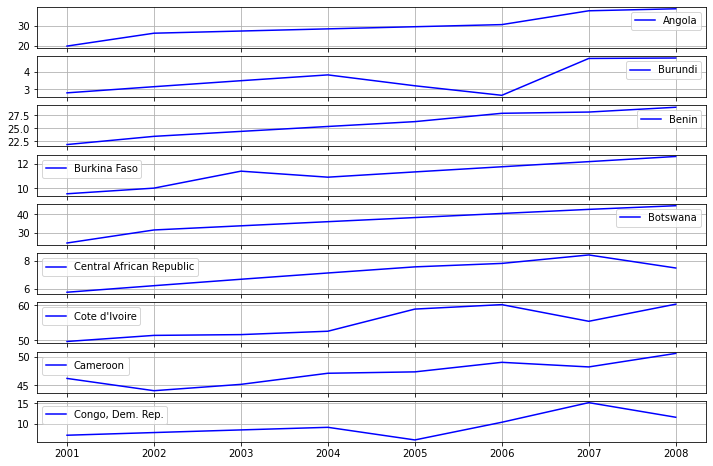

In [78]:
elec_rate_df.transpose().plot(subplots=True, grid=True, style='b', figsize=(12, 8))

In [86]:
# import matplotlib.pyplot as plt



In [155]:
output = os.path.join(dir_path, 'test_data_output.xlsx')

# Write grouped aid data to excel file
sector_aid.to_excel(output, sheet_name='aid_by_year')

In [156]:
# Write the transposed sub-sector data to excel file
sub_sec_sum.to_excel(output, sheet_name='sub_sector')

In [157]:
# Append the transpised electricity data to new excel sheet
# if_sheet_exists para needs to be set to overlay to be able to write multiple df into one single sheet
with pd.ExcelWriter(output,
                    engine='openpyxl',
                    mode='a',
                    if_sheeet_exists="overlay",
) as writer:
    writer.book = openpyxl.load_workbook(output)
    stacked_elec_df.to_excel(writer, sheet_name='sub_sector', startcol=7)
#     sector_aid.to_excel(writer, sheet_name='elec_rate', startcol=15)
    